<a href="https://colab.research.google.com/github/RegisKonan/FinalProject/blob/main/regis_djaha_Pytorch_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import torch
from torch.utils.data import Dataset
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch import optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

## load Dataset using pandas

In [124]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
path = "/content/data.csv"
data= pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Drop the columns id and Unnamed: 32

In [126]:
data = data.drop(['id','Unnamed: 32'],axis=1)

In [127]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## separate your input data and target (the target correspond to the column diagnosis)

In [128]:
X =data.iloc[:,1:] 
y =data.iloc[:,0:1] 

In [129]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [130]:
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


## Convert your data into numpy arrays

In [131]:
X = X.to_numpy()
y = y.to_numpy()

In [132]:
X.shape

(569, 30)

In [133]:
y.shape

(569, 1)

## transform you target values into 0 (for M) and 1 (for B)

In [134]:
y

array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
      

In [135]:
y = np.where(y=='M',0,1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

## Split your data into train and test sets (20% for test)

In [136]:
def split_data(X,y, train_size=0.8):
  # ADD YOUR CODES
  # shuffle the data before splitting it
  Y=y.reshape((y.shape[0],1))
  #print(Y.shape)
  data=np.hstack((X,y))
  
  data1=np.take(data,np.random.permutation(data.shape[0]),axis=0,out=data)

  size=int(train_size*X.shape[0])
  #print(np.shape(data1))
  X_train=data1[:size,:-1]
  X_test=data1[size:,:-1]
  y_train=data1[:size,-1]
  y_test=data1[size:, -1]

  return X_train, X_test, y_train.reshape(y_train.shape[0],1), y_test.reshape(y_test.shape[0],1)

In [137]:
X_train,X_test, y_train, y_test = split_data(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455, 1), (114, 30), (114, 1))

## Feature scaling

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
X_train = sc.transform(X_train)

In [139]:
X_train

array([[-0.53037096, -0.80695427, -0.55286575, ..., -1.00049765,
        -0.66315205, -1.1274627 ],
       [-0.33125718,  0.60627158, -0.1945498 , ...,  1.38319348,
         2.30492533,  1.31274587],
       [ 1.60583542,  0.68504938,  1.56190095, ...,  1.87850593,
        -0.21543574, -0.4038032 ],
       ...,
       [ 2.65829396,  1.19113701,  2.59924009, ...,  1.42698635,
        -0.48938803, -0.33580464],
       [-0.54459337, -0.31996428, -0.57600957, ..., -0.48766806,
         0.32464164, -0.11798811],
       [ 0.45950896, -0.33190031,  0.47083507, ...,  1.00566876,
         1.38757652,  1.18006575]])

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_test)
X_test = sc.transform(X_test)

In [141]:
X_test

array([[-0.31611517, -0.28204273, -0.31850865, ..., -0.56988725,
        -0.194125  , -0.37931722],
       [-0.26241868, -1.1663211 , -0.33804021, ..., -1.26249942,
        -1.46879098, -1.13368849],
       [-0.34720262, -0.55837972, -0.34617836, ..., -0.55112967,
         0.35974772, -0.01904573],
       ...,
       [-0.85590624,  0.43005643, -0.77790724, ...,  0.42536837,
         0.15678751,  0.57238586],
       [-0.24546189, -0.80070601, -0.15493182, ...,  1.31123099,
         0.50390637,  3.07793588],
       [ 2.15674966,  0.62774367,  2.17217229, ...,  1.99848384,
         1.79564377,  0.83399144]])

Why is it important to scale this data?


Scaling the data is important because it can have a significant impact on the performance of many Deep learning algorithms. When the input features have different scales (i.e., different ranges of values), some machine learning algorithms may not perform well. Specifically, if one feature has a larger range of values than another feature, it can dominate the objective function and make the learning algorithm unable to learn from other features correctly.

##Implement the BreastCancerDataset class that inherit from pytorch Dataset

In [142]:
from torch.utils.data import Dataset
import pandas as pd

class BreastCancerDataset(Dataset):

    def __init__(self, X, y):
        # Initialize data, download, etc.
        # read with numpy or pandas
        self.n_samples = X.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(X) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(y) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [143]:
# create dataset
train_dataset = BreastCancerDataset(X_train, y_train)

# get first sample and unpack
first_data = train_dataset[0]
features, labels = first_data
print(features, labels)

print(features.shape)

tensor([-0.5304, -0.8070, -0.5529, -0.5582, -1.0815, -0.6002, -0.6304, -0.8401,
        -0.5333, -1.1099, -0.6111, -0.6952, -0.5956, -0.5117, -0.3324, -0.1910,
        -0.3423, -0.8560, -0.0530, -0.7674, -0.6085, -0.9951, -0.6190, -0.5957,
        -0.9836, -0.5596, -0.6118, -1.0005, -0.6632, -1.1275],
       dtype=torch.float64) tensor([1.], dtype=torch.float64)
torch.Size([30])


In [144]:
# create dataset
test_dataset = BreastCancerDataset(X_test, y_test)

# get first sample and unpack
first_data = test_dataset[0]
features, labels = first_data
print(features, labels)

print(features.shape)

tensor([-0.3161, -0.2820, -0.3185, -0.3742,  0.1924, -0.1734, -0.6354, -0.6446,
        -0.3112, -0.5172, -0.5033, -0.1890, -0.5258, -0.3994, -0.7349, -0.4911,
        -0.4535, -0.6395, -0.3631, -0.4297, -0.4090, -0.1453, -0.4443, -0.4320,
        -0.2251, -0.2692, -0.5148, -0.5699, -0.1941, -0.3793],
       dtype=torch.float64) tensor([1.], dtype=torch.float64)
torch.Size([30])


In [145]:
from torch.utils.data import DataLoader
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=16,
                          shuffle=True)


In [146]:
from torch.utils.data import DataLoader
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=16,
                          shuffle=True)


## Feedforward network

In [147]:


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [148]:
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size=hidden_size
        self.num_classes=num_classes
        ## add your layers
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3=nn.Linear(hidden_size, num_classes)
        self.sigmoid=nn.Sigmoid()
        

    
    def forward(self, x):
      ## fit the data x to the first layer
      out = self.l1(x)
      ## apply non linearity to the output of the first layer
      out = self.relu(out)
      ## pass the output to the last layer
      out = self.l2(out)
      out = self.relu(out)
      out = self.l3(out)
      ## apply non linearity to the output of the second layer
      out = self.sigmoid(out)
      # no activation and no softmax at the end
      return out

In [181]:
## initialize your model

# Hyper-parameters 
input_size = X_train.shape[1]
hidden_size = 90
num_classes = 1
num_epochs = 100
learning_rate = 0.0001

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


In [182]:
X_train.shape

(455, 30)

In [183]:
y_train.shape

(455, 1)

## define a criterion and optimizer

In [184]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

## Train your model (save the loss in a list and plot it)

In [185]:
# Dummy Training loop
losses = []
for epoch in range(num_epochs):
  for i, (input, label) in enumerate(train_loader):
    #X = torch.from_numpy(X_train).clone()
    #y_train = torch.from_numpy(X_train).clone()
    #y_test = torch.from_numpy(X_train).clone()
    input = input.to(device)
    label = label.type(torch.float32).to(device)
    input = input.type(torch.float32)
    y_predicted = model.forward(input)
    ##compute the loss between your prediction and the true y
    loss = criterion(y_predicted,label)
    
    # Backward pass 
    loss.backward()
    #print(w.grad)

    ## update parameters
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()
     # Run your training process
    if (i+1) % 10 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())

Epoch [1/100], Loss: 0.7130
Epoch [1/100], Loss: 0.6723
Epoch [2/100], Loss: 0.7078
Epoch [2/100], Loss: 0.6936
Epoch [3/100], Loss: 0.7186
Epoch [3/100], Loss: 0.6804
Epoch [4/100], Loss: 0.7149
Epoch [4/100], Loss: 0.6685
Epoch [5/100], Loss: 0.6960
Epoch [5/100], Loss: 0.6904
Epoch [6/100], Loss: 0.7065
Epoch [6/100], Loss: 0.6871
Epoch [7/100], Loss: 0.6699
Epoch [7/100], Loss: 0.7047
Epoch [8/100], Loss: 0.7127
Epoch [8/100], Loss: 0.6655
Epoch [9/100], Loss: 0.6720
Epoch [9/100], Loss: 0.7095
Epoch [10/100], Loss: 0.6872
Epoch [10/100], Loss: 0.6694
Epoch [11/100], Loss: 0.6909
Epoch [11/100], Loss: 0.7140
Epoch [12/100], Loss: 0.6913
Epoch [12/100], Loss: 0.6863
Epoch [13/100], Loss: 0.6582
Epoch [13/100], Loss: 0.6864
Epoch [14/100], Loss: 0.6848
Epoch [14/100], Loss: 0.6811
Epoch [15/100], Loss: 0.6892
Epoch [15/100], Loss: 0.6942
Epoch [16/100], Loss: 0.6823
Epoch [16/100], Loss: 0.6703
Epoch [17/100], Loss: 0.6794
Epoch [17/100], Loss: 0.6596
Epoch [18/100], Loss: 0.6899
Epo

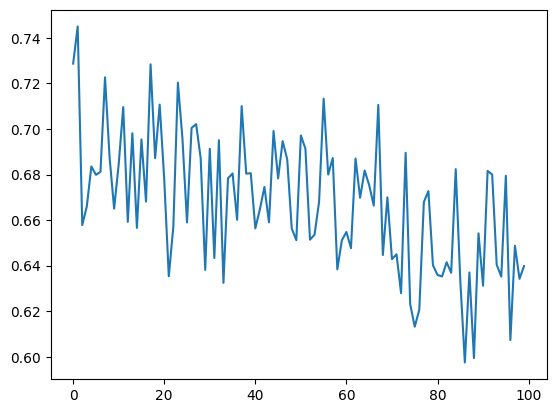

In [186]:
plt.plot(losses)

## Test the model

In [202]:
# In test phase, we don't need to compute gradients (for memory efficiency)
torch.manual_seed(5)
np.random.seed(5)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for input, labels in test_loader:
    labels = labels.to(device)
    input = input.type(torch.float32)
    y_predicted= model(input.to(device))
    # max returns (value ,index)
    #_, predicted = torch.max(y_predicted.data, 1)
    predicted = torch.where(y_predicted>=0.5,1,0).flatten()
    n_samples += input.shape[0]
    n_correct += (predicted == labels[0]).sum().item()
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test input: {acc} %')

Accuracy of the network on the 10000 test input: 83.33333333333333 %


In [156]:
# Remember that in test phase, we don't need to compute gradients 

#compute also the accuracy on your test set

## Saving your model

In [157]:
## save your model
torch.save(model.state_dict(), 'model_Regis.pth')

## change your activation functions, reimplement your model class with the new activation functions and train the model with the best hyper parameters that you found so far.

Plot the loss during training

In [247]:
## initialize your model

# Hyper-parameters 
input_size = X_train.shape[1]
hidden_size1 = 70
hidden_size2 = 100
num_classes = 1
num_epochs = 200
learning_rate = 0.0001

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


In [248]:
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size=hidden_size
        self.num_classes=num_classes
        ## add your layers
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.LeakyReLU()
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu = nn.LeakyReLU()
        self.l3=nn.Linear(hidden_size2, num_classes)
        self.sigmoid=nn.Sigmoid()
        

    
    def forward(self, x):
      ## fit the data x to the first layer
      out = self.l1(x)
      ## apply non linearity to the output of the first layer
      out = self.relu(out)
      ## pass the output to the last layer
      out = self.l2(out)
      out = self.relu(out)
      out = self.l3(out)
      ## apply non linearity to the output of the second layer
      out = self.sigmoid(out)
      # no activation and no softmax at the end
      return out

In [249]:
# Dummy Training loop
losses = []
for epoch in range(num_epochs):
  for i, (input, label) in enumerate(train_loader):
    #X = torch.from_numpy(X_train).clone()
    #y_train = torch.from_numpy(X_train).clone()
    #y_test = torch.from_numpy(X_train).clone()
    input = input.to(device)
    label = label.type(torch.float32).to(device)
    input = input.type(torch.float32)
    y_predicted = model.forward(input)
    ##compute the loss between your prediction and the true y
    loss = criterion(y_predicted,label)
    
    # Backward pass 
    loss.backward()
    #print(w.grad)

    ## update parameters
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()
     # Run your training process
    if (i+1) % 10 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())

Epoch [1/200], Loss: 0.6986
Epoch [1/200], Loss: 0.6777
Epoch [2/200], Loss: 0.7120
Epoch [2/200], Loss: 0.6978
Epoch [3/200], Loss: 0.7058
Epoch [3/200], Loss: 0.6748
Epoch [4/200], Loss: 0.6820
Epoch [4/200], Loss: 0.6921
Epoch [5/200], Loss: 0.6837
Epoch [5/200], Loss: 0.7174
Epoch [6/200], Loss: 0.7260
Epoch [6/200], Loss: 0.7149
Epoch [7/200], Loss: 0.7246
Epoch [7/200], Loss: 0.7053
Epoch [8/200], Loss: 0.7068
Epoch [8/200], Loss: 0.7053
Epoch [9/200], Loss: 0.7105
Epoch [9/200], Loss: 0.7276
Epoch [10/200], Loss: 0.7337
Epoch [10/200], Loss: 0.6993
Epoch [11/200], Loss: 0.6987
Epoch [11/200], Loss: 0.6703
Epoch [12/200], Loss: 0.6858
Epoch [12/200], Loss: 0.7268
Epoch [13/200], Loss: 0.7084
Epoch [13/200], Loss: 0.7175
Epoch [14/200], Loss: 0.7084
Epoch [14/200], Loss: 0.7246
Epoch [15/200], Loss: 0.7180
Epoch [15/200], Loss: 0.7262
Epoch [16/200], Loss: 0.6877
Epoch [16/200], Loss: 0.6998
Epoch [17/200], Loss: 0.6760
Epoch [17/200], Loss: 0.6735
Epoch [18/200], Loss: 0.6748
Epo

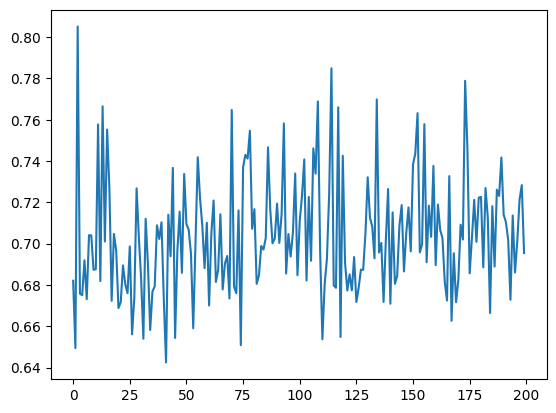

In [250]:
plt.plot(losses)

In [251]:
# In test phase, we don't need to compute gradients (for memory efficiency)
torch.manual_seed(39)
np.random.seed(39)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for input, labels in test_loader:
    labels = labels.to(device)
    input = input.type(torch.float32)
    y_predicted= model(input.to(device))
    # max returns (value ,index)
    #_, predicted = torch.max(y_predicted.data, 1)
    predicted = torch.where(y_predicted>=0.5,1,0).flatten()
    n_samples += input.shape[0]
    n_correct += (predicted == labels[0]).sum().item()
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test input: {acc} %')

Accuracy of the network on the 10000 test input: 43.85964912280702 %



$$
\begin{aligned}
& \text {Results Interpretation }\\
&\begin{array}{cccc}
\hline \hline \text { learning rate } & \text { Num_Epochs } & \text { Hidden_size1 } & \text { Hidden_size2} & \text { Accuracy } \\
\hline 
0.001& 200 & 100 & 100 & 51.75 &  \\
0.001 & 200 & 100 & 130 & 57.89 &  \\
0.001 & 200 & 100 & 150 & 58.77 &   \\
0.001 & 200 & 80 & 100 & 39.47 & \\
0.001 & 200 & 70 & 100 & 43.85 &  \\
\hline
\end{array}
\end{aligned}
$$

When we increase the size of Hidden 2 and decrease the size of Hidden 1, we get good accuracy, while when we increase the size of Hidden 1 and decrease the size of Hidden 2, we get poor accuracy. That is why it is ideal to always increase the size of the Hidden 2.